In [1]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# 🧮 Model Evaluation Results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'Neural Network', 'KMeans'],
    'R2': [0.299, 0.476, 0.216, 0.3427, 0.0874],
    'RMSE': [250.09, 216.38, 264.58, 242.23, 285.44]
})

results

,Model,R2,RMSE
0,Linear Regression,0.2990,250.09
1,Random Forest,0.4760,216.38
2,SVR,0.2160,264.58
3,Neural Network,0.3427,242.23
4,KMeans,0.0874,285.44


In [3]:
# 🏆 Sort models by RMSE (lower = better)
results_sorted = results.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
results_sorted

,Model,R2,RMSE
0,Random Forest,0.4760,216.38
1,Neural Network,0.3427,242.23
2,Linear Regression,0.2990,250.09
3,SVR,0.2160,264.58
4,KMeans,0.0874,285.44


C:\Users\Mohit\AppData\Local\Temp\ipykernel_12144\3108291088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_sorted, palette='Blues_d')


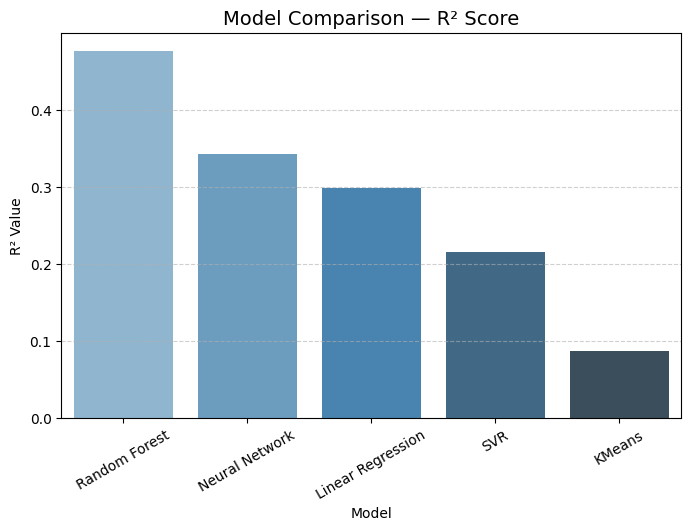

In [4]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2', data=results_sorted, palette='Blues_d')
plt.title("Model Comparison — R² Score", fontsize=14)
plt.ylabel("R² Value")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

C:\Users\Mohit\AppData\Local\Temp\ipykernel_12144\3489257579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_sorted, palette='Greens_d')


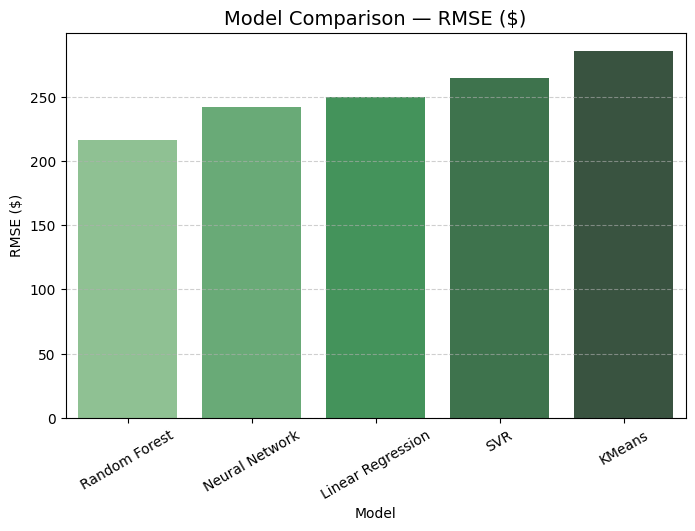

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE', data=results_sorted, palette='Greens_d')
plt.title("Model Comparison — RMSE ($)", fontsize=14)
plt.ylabel("RMSE ($)")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

C:\Users\Mohit\AppData\Local\Temp\ipykernel_12144\526554283.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Mean_Price', data=cluster_summary, palette='Purples_d')


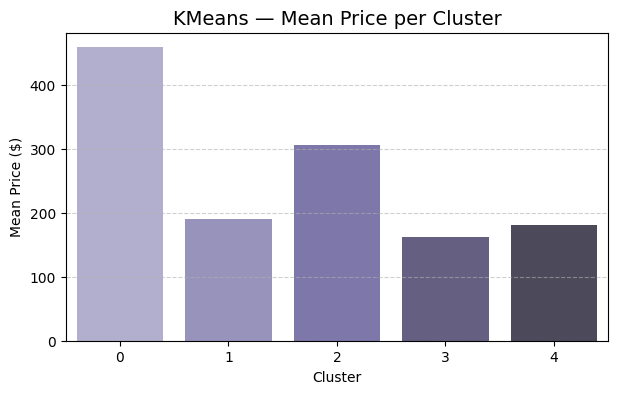

,Cluster,Mean_Price
0,0,458.59
1,1,190.50
2,2,305.63
3,3,161.91
4,4,180.20


In [6]:
# 🌀 KMeans Price Segmentation (example visualization)
import numpy as np

# Example cluster summary (from report)
cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4],
    'Mean_Price': [458.59, 190.50, 305.63, 161.91, 180.20]
})

plt.figure(figsize=(7,4))
sns.barplot(x='Cluster', y='Mean_Price', data=cluster_summary, palette='Purples_d')
plt.title("KMeans — Mean Price per Cluster", fontsize=14)
plt.ylabel("Mean Price ($)")
plt.xlabel("Cluster")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

cluster_summary

In [7]:
# 🏅 Identify Best Model
best_by_r2 = results.loc[results['R2'].idxmax()]
best_by_rmse = results.loc[results['RMSE'].idxmin()]

print(f"🏆 Best by R²: {best_by_r2['Model']} (R² = {best_by_r2['R2']:.3f})")
print(f"🏆 Best by RMSE: {best_by_rmse['Model']} (RMSE = ${best_by_rmse['RMSE']:.2f})")

🏆 Best by R²: Random Forest (R² = 0.476)
🏆 Best by RMSE: Random Forest (RMSE = $216.38)


In [8]:
print("""
# 🧾 Final Model Comparison Summary

✅ **Best Model:** Random Forest  
   - Highest R² (0.476)  
   - Lowest RMSE ($216.38)  
   - Strong generalization for Airbnb price prediction.

🔹 **Neural Network:** Moderate accuracy (R² = 0.34), potential for tuning.  
🔹 **Linear Regression & SVR:** Decent, but limited with complex patterns.  
🔹 **KMeans:** Not for prediction — used for **market segmentation**.

📊 **Conclusion:** Random Forest remains the most reliable model
for predicting Airbnb listing prices based on this dataset.
""")


# 🧾 Final Model Comparison Summary

✅ **Best Model:** Random Forest  
   - Highest R² (0.476)  
   - Lowest RMSE ($216.38)  
   - Strong generalization for Airbnb price prediction.

🔹 **Neural Network:** Moderate accuracy (R² = 0.34), potential for tuning.  
🔹 **Linear Regression & SVR:** Decent, but limited with complex patterns.  
🔹 **KMeans:** Not for prediction — used for **market segmentation**.

📊 **Conclusion:** Random Forest remains the most reliable model
for predicting Airbnb listing prices based on this dataset.

